In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [80]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [70]:
data = pd.read_csv("ds_salaries.csv", sep = ",")

##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [5]:
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\Users\\r.bennetayeb\\Desktop\\these\\Enseignement\\SAE_projet\\Data\\ds_salaries.csv'

In [16]:
# Lire le fichier depuis le répertoire du projet
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [71]:
#données manquantes 

data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

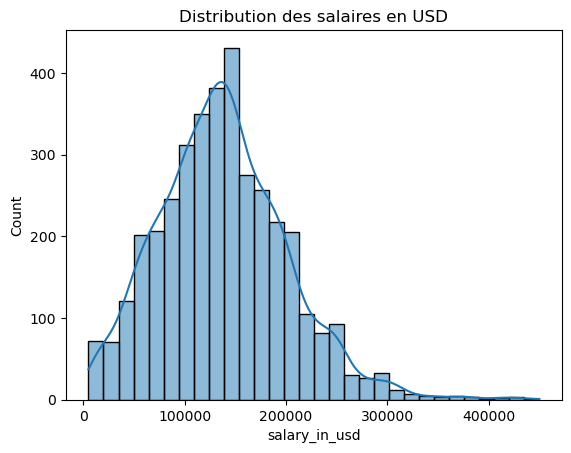

In [81]:
# Distribution des salaires en USD
sns.histplot(data["salary_in_usd"], kde = True, bins = 30)
plt.title("Distribution des salaires en USD")
plt.show()

In [74]:
# liste des pays concerné par l'étude 
data["employee_residence"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [75]:
#Salaire moyen par rôle
print(data.groupby(["employment_type"])[["salary"]].mean())

# Salaire moyen par pays
print(data.groupby(["employee_residence"])[["salary"]].mean())

# Salaires moyens par niveau d'expérience
print(data.groupby(["experience_level"])[["salary"]].mean())

                        salary
employment_type               
CT               113300.000000
FL               288755.500000
FT               191146.539268
PT                79910.823529
                           salary
employee_residence               
AE                  100000.000000
AM                   50000.000000
AR                   35500.000000
AS                   32777.500000
AT                   65833.333333
...                           ...
TR                  114600.000000
UA                   57850.000000
US                  152822.011651
UZ                  103000.000000
VN                   33466.666667

[78 rows x 1 columns]
                         salary
experience_level               
EN                188381.178125
EX                246802.201754
MI                248200.306832
SE                170048.965421


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [82]:
# Filtrer les salaires pour un pays donné (ex : US)
data_residence = data[data["employee_residence"] == "ES"]
data_residence

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
91,2023,SE,FT,Data Scientist,45000,EUR,48289,ES,0,ES,M
92,2023,SE,FT,Data Scientist,36000,EUR,38631,ES,0,ES,M
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
264,2023,SE,FT,Data Scientist,45000,EUR,48289,ES,0,ES,M
...,...,...,...,...,...,...,...,...,...,...,...
3625,2021,SE,FT,AI Scientist,55000,USD,55000,ES,100,ES,L
3673,2021,MI,FT,Data Scientist,32000,EUR,37825,ES,100,ES,L
3727,2020,MI,FT,Data Scientist,34000,EUR,38776,ES,100,ES,M
3728,2021,MI,FT,Data Scientist,39600,EUR,46809,ES,100,ES,M


In [79]:
# Top 5 des entreprises qui paient le plus
data.groupby(["company_location"])[["salary"]].sum().sort_values("salary", ascending=False).head(5)

,salary
company_location,
US,479302687
IN,105213997
CL,30400000
JP,20452000
HU,17600000


In [147]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
data2 = data.groupby(["job_title"])[["salary"]].mean()
data2[data2["salary"] > 100000]

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
data_remote = data.groupby(["employee_residence"])[["remote_ratio"]].mean()
data_remote[data_remote["remote_ratio"] == 100]


,remote_ratio
employee_residence,
AR,100.0
BG,100.0
CF,100.0
CL,100.0
DO,100.0
EE,100.0
EG,100.0
IR,100.0
KE,100.0


In [134]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# On garde les données de gens ayant un taux de TW de 100 %
data_remote_100 = data[data["remote_ratio"] == 100]
print(f"Le salaire moyen des employés en 100% TW est de {data_remote_100['salary_in_usd'].mean().round(2)} $")

# Comparer salaires moyens pour deux catégories*

# Comme catégories nous choississons les métiers en lien avec l'IA et avec la DATA 
data_IA = data[data["job_title"].str.contains("AI")]
print(f"\nLe salaire moyen dans les métiers de l'IA est de {data_IA['salary_in_usd'].mean().round(2)} $")

data_DATA = data[data['job_title'].str.contains("Data")]
print(f"\nLe salaire moyen dans les métiers de la DATA est de {data_DATA['salary_in_usd'].mean().round(2)} $")

print(f"\nLa différence de salaire entre les métiers dans l'IA et dans la DATA est de {(data_DATA['salary_in_usd'].mean().round(2) - data_IA['salary_in_usd'].mean().round(2)).round(2)} $")

Le salaire moyen des employés en 100% TW est de 136481.45 $

Le salaire moyen dans les métiers de l'IA est de 116388.31 $

Le salaire moyen dans les métiers de la DATA est de 134060.41 $

La différence de salaire entre les métiers dans l'IA et dans la DATA est de 17672.1 $


In [143]:
# Ajouter une colonne pour les fourchettes de salaires
def categorie_sal(salaire):
    if salaire < 50000:
        return "moins de 50k"
    elif 50000 <= salaire < 100000:
        return "entre 50k et 100k"
    elif 100000 <= salaire < 150000:
        return "entre 100k et 150k"
    else:
        return "plus de 150k"

data['fourchette_salaire'] = data['salary_in_usd'].apply(categorie_sal)

# On affiche le tableau pour controler
print(data[["fourchette_salaire", "salary_in_usd"]])


      fourchette_salaire  salary_in_usd
0      entre 50k et 100k          85847
1           moins de 50k          30000
2           moins de 50k          25500
3           plus de 150k         175000
4     entre 100k et 150k         120000
...                  ...            ...
3750        plus de 150k         412000
3751        plus de 150k         151000
3752  entre 100k et 150k         105000
3753  entre 100k et 150k         100000
3754   entre 50k et 100k          94665

[3755 rows x 2 columns]


In [100]:
# Analyse des corrélations
# Relation entre télétravail et salaire
print(data['remote_ratio'].corr(data['salary_in_usd']))

# On voit qu'il n'y a pas de corrélation entre le TW et le salaire

-0.06417098519057557


In [145]:
# Salaire moyen par taille d'entreprise
print(data.groupby(["company_size"])[["salary"]].mean().round(2))
#on fait un groupby par la taille de l'entreprise. On voit que les grandes entreprise ont un salaire moyen plus élevé que les moyennes et petites entreprise.

                 salary
company_size           
L             438794.37
M             150712.84
S             281430.10


In [146]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = data.pivot_table(
 index='experience_level',
    columns='remote_ratio',
    values='salary_in_usd',
    aggfunc='mean'
)
print("Tableau croisé des salaires :\n", pivot_table)
#On voit que les personnes qui ne gagne le plus d'argent sont les expert en 100% tw.

Tableau croisé des salaires :
 remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
